# Chapter 2 - Training Simple Machine Learning Algorithms for Classifcation

# Perceptron

## 0 - Class Perceptron

In [116]:
# -*- coding: utf-8 -*-
import numpy as np

class Perceptron(object):
    """
    Perceptron classifier.

    Parameters
    ------------
    eta : float -> Learning rate (between 0.0 and 1.0).
    n_iter : int -> Number of epochs or samples.
    random_state : int -> Random number generator seed for random weight initialization.

    Attributes
    -----------
    w_ : 1d-array -> Weights after fitting.
    errors_ : list -> Number of misclassifications (updates) in each epoch.
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """
        Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])  # Iniciação randômica do vetor de pesos.
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):  # xi se refere à cada linha do vetor de amostras X.
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update  # Atualiza o bias.
                self.w_[1:] += update * xi  # Atualiza o restante dos pesos.
                errors += int(update != 0.0)  # Conta +1 se o Perceptron errou a predição.
            self.errors_.append(errors)  # Lista com o valor dos erros, por época.
        return self

    def net_input(self, X):
        """Calculate net input. Produto escalar X.W + bias."""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step."""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## 1 - Iris Dataset

In [117]:
import pandas as pd

df = pd.read_csv('iris_dataset.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


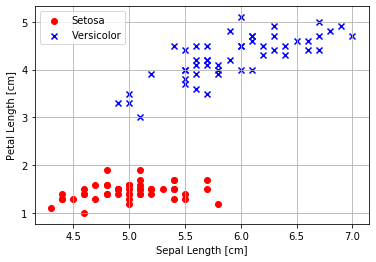

In [118]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Select Setosa (-1) and Versicolor (1) flowers.
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# Extract sepal_length and petal_length.
X = df.iloc[0:100, [0, 2]].values

# Plot data.
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='Versicolor')

plt.xlabel('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.legend(loc='upper left')
plt.grid()
plt.show()

## 2 - Training The Perceptron

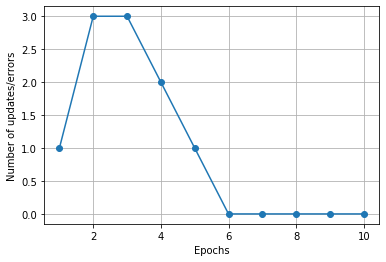

In [119]:
percep = Perceptron(eta=0.1, n_iter=10)

percep.fit(X, y)

plt.plot(range(1, len(percep.errors_) + 1), percep.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates/errors')
plt.grid()
plt.show()

## 3 - Plotting Decision Regions

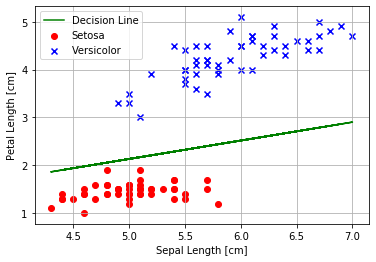

In [134]:
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='Versicolor')
# Decision Line.
DL = -percep.w_[0]/percep.w_[2] - percep.w_[1]/percep.w_[2]*X[:, 0]
plt.plot(X[:, 0], DL,
        color='green', label='Decision Line')

plt.xlabel('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.legend(loc='upper left')
plt.grid()
plt.show()

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

# Adaptive Linear Neuron (Adaline) and The Convergence of Learning

No Perceptron, a classe predita é comparada diretamente com a classe verdadeira. Após isso, calcula-se o erro e atualiza-se os pesos.

Já no Adaline, a classe verdadeira é comparada com uma **função de ativação linear**. Após isso, calcula-se o erro e atualiza-se os pesos.

## 0 - Class AdalineGD

In [135]:
# -*- coding: utf-8 -*-
import numpy as np

class AdalineGD(object):
    """
    Adaline with Gradient Descendet classifier.

    Parameters
    ------------
    eta : float -> Learning rate (between 0.0 and 1.0).
    n_iter : int -> Number of epochs or samples.
    random_state : int -> Random number generator seed for random weight initialization.

    Attributes
    -----------
    w_ : 1d-array -> Weights after fitting.
    cost_ : list -> Sum-of-squares cost function value in each epoch.
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """
        Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])  # Iniciação randômica do vetor de pesos.
        self.cost_ = []

        for i in range(self.n_iter):
            
            net_input = self.net_input(X)
            
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input. Produto escalar X.W + bias."""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation."""
        return X
    
    def predict(self, X):
        """Return class label after unit step."""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

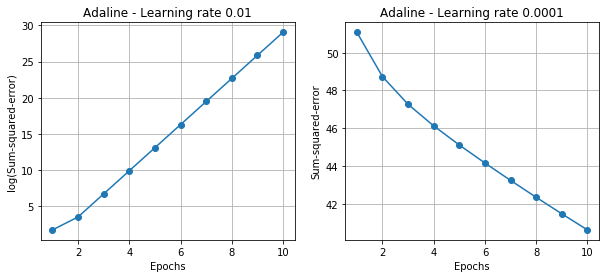

In [136]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].grid()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].grid()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

